<a href="https://colab.research.google.com/github/puraminy/mini_proj3/blob/master/SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !pip install minisom

#Import Alphabets Dataset

fatal: destination path 'mini_proj3' already exists and is not an empty directory.


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


((500, 784), (500,), 7, 0)

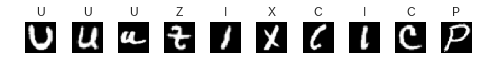

In [2]:
#!git clone "https://github.com/puraminy/mini_proj3"
!git clone "https://github.com/puraminy/mini_proj3"

import numpy as np
alphabet = np.load('mini_proj3/Alphabets.npy')
label = np.load('mini_proj3/Alphabet_labels.npy')
label2 = ['C', 'I', 'O', 'P', 'S', 'U', 'X', 'Z']


import matplotlib.pyplot as plt
idx = np.random.randint(499, size=10)

fig, axes = plt.subplots(1, 10)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=None, wspace=0.5)

# for i in range(len(alphabet)):
#   alphabet[i] = alphabet[i] * (255.0 / alphabet[i].max())

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
alphabet = sc.fit_transform(alphabet)
  
pltalpha = alphabet[idx,:]
pltlbl = label[idx]

for i in range(10):
  axes[i].imshow(-1*np.reshape(pltalpha[i,:],[28,28]))
  axes[i].axis('off')
  xlabel = label2[pltlbl[i]]; axes[i].set_title(xlabel)



alphabet.shape, label.shape, max(label), min(label)


(784,)
iteration= 0 delta = 1.1439803230627411e-18
winner= (24, 11)  label: P
winner= (4, 4)  label: O
winner= (13, 16)  label: X
winner= (17, 20)  label: U
winner= (6, 6)  label: Z
winner= (20, 16)  label: U
winner= (15, 2)  label: U
winner= (17, 1)  label: X
winner= (6, 12)  label: S
winner= (9, 7)  label: I
winner= (4, 7)  label: U
winner= (17, 21)  label: X
winner= (6, 21)  label: I
winner= (6, 5)  label: X
winner= (2, 3)  label: I
winner= (3, 2)  label: U
winner= (20, 5)  label: C
winner= (4, 6)  label: P
winner= (0, 4)  label: C
winner= (21, 10)  label: O
winner= (12, 1)  label: U
winner= (1, 4)  label: P
winner= (3, 2)  label: U
winner= (11, 4)  label: X
winner= (17, 3)  label: X
winner= (11, 16)  label: S
winner= (12, 18)  label: C
winner= (16, 15)  label: Z
winner= (16, 8)  label: Z
winner= (13, 5)  label: P
winner= (9, 17)  label: Z
winner= (1, 20)  label: I
winner= (4, 5)  label: X
winner= (14, 3)  label: Z
winner= (24, 10)  label: S
winner= (9, 17)  label: Z
winner= (5, 4) 

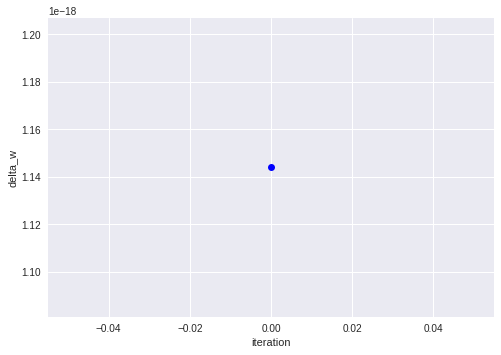

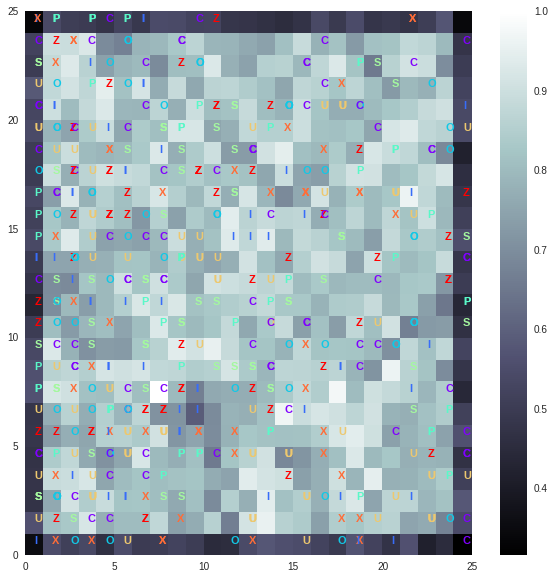

In [27]:
# This code added by Ahmad Pouramini

print(alphabet[1].shape)


from mini_proj3.mysom import MiniSom

som = MiniSom(x=25, y=25, input_len=28*28, sigma=1, learning_rate=1.0, neighborhood_function='bubble')  # initialization of 25x25 SOM
som.random_weights_init(alphabet)  # initialize weights with random values 
som.train_delta(alphabet, delta=0.0001, max_iteration=4000)

plt.figure(figsize=(10, 10))

from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()

for x, t in zip(alphabet, label):  # scatterplot
     w = som.winner(x)
     print("winner=", w, " label:" , label2[t])
     plt.text(w[0]+.5,
               w[1]+.5,
               label2[t],
               color=plt.cm.rainbow(t / 7.),
               fontdict={'weight': 'bold',  'size': 11}
               )

plt.show()


#SOM

In [0]:
# SOM Training
from minisom import MiniSom

def SOM (data = alphabet, x = 25, y = 25, features = 28*28, radius = 0, learningrate = 1, decay = 0.9, neighborhood='gaussian', ini_weights = np.random.random([25,25,28*28])):
    # initial weights
    
    weights = ini_weights
    delta_w = 1
    i=1
    while delta_w>0.0001:
        som = MiniSom(x=x, y=y, input_len=features, sigma=0.0, learning_rate=learningrate,
                      neighborhood_function=neighborhood)  # initialization of 25x25 SOM
        som._weights = weights-0
        #weights = som.get_weights() - 0
        som.train_random(data, 1)  # trains the SOM with 1 epoch
        #som.train_batch(data, 1)
        learningrate = decay * learningrate - 0
        delta_w = np.max(np.abs(weights-som._weights))
        weights = som._weights - 0
        i=i+1
    return som, i, delta_w, weights

##Constant Parameters

In [30]:
features = 28*28
learningrate = 0.9
#decay = 0.9
x=625;y=1
# ini_weights (1) PCA
som0 = MiniSom(x=x, y=y, input_len=features)  # initialization of 25x25 SOM
som0.pca_weights_init(alphabet)
ini_weights = som0._weights - 0

# ini_weights (2) Distribute from min to max value of input data [0:1]    
#ini_weights = np.expand_dims(np.linspace(0, 1, x*y),axis=1)*np.ones([1,features])
#ini_weights = np.reshape(ini_weights, [x, y, features])

# ini_weights (3) Input mean values    
#ini_weights = np.expand_dims(np.mean(alphabet,axis=0),axis=1)*np.ones([1,x*y])
#ini_weights = np.reshape(weights, [x, y, features])

# ini_weights (4) Random
#ini_weights = np.random.random([x,y,features])

# ini_weights (5) Zeros
#ini_weights = np.zeros([x,y,features])

# ini_weights (6) Ones
#ini_weights = np.ones([x,y,features])

/content/mini_proj3/mysom.py:119: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')
/content/mini_proj3/mysom.py:286: UserWarning: PCA initialization inappropriate:One of the dimensions of the map is 1.
  warn(msg)
/content/mini_proj3/mysom.py:291: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


#Part A

iteration= 0 delta = 4.541742530536713e-19
Number of Winning Nodes: 243


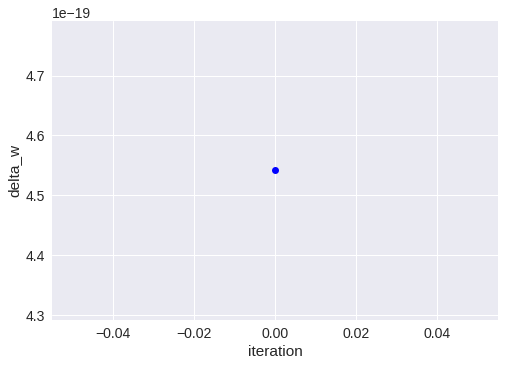

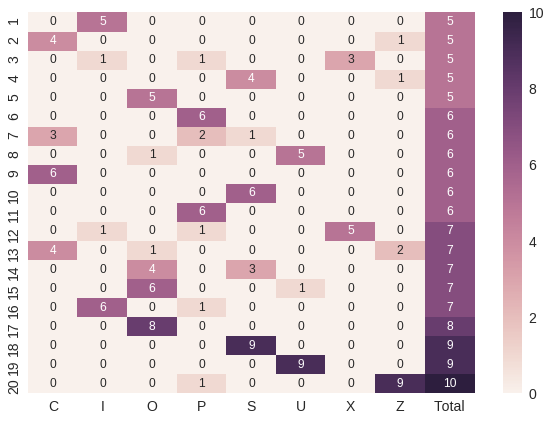

In [38]:
x = 625; y = 1
ini_weights = np.reshape(ini_weights,[x,y,features])
radius = 0

#neighborhood='mexican_hat'
#neighborhood='bubble'
#neighborhood='gaussian'
neighborhood='triangle'

somA = MiniSom(x=x, y=y, input_len=features, sigma=radius, learning_rate=learningrate, neighborhood_function=neighborhood)  # initialization of 25x25 SOM
somA._weights = ini_weights
#somA.random_weights_init(alphabet)  # initialize weights with random values 
somA.train_delta(alphabet, delta=0.0001, max_iteration=2000)

weightsA = somA._weights



# Visualizing Results
if x>1 and y>1:
    plt.figure(figsize=(8, 8))
    wmap = {}
    im = 0
    for x, t in zip(alphabet, label):  # scatterplot
        w = somA.winner(x)
        wmap[w] = im
        plt. text(w[0]+.5,
                  w[1]+.5,
                  label2[t],
                  color=plt.cm.rainbow(t / 7.),
                  fontdict={'weight': 'bold',  'size': 11}
                  )
        im = im + 1
    plt.axis([0, weightsA.shape[0], 0,  weightsA.shape[1]])
    #plt.savefig('resulting_images/som_digts.png')
    plt.show()


mappings = somA.win_map(alphabet)
print("Number of Winning Nodes: "+str(len(mappings)))
nodes = list(mappings) # position of nodes that contain values!
values = []
for i in nodes:
    values.append(mappings[i])
sorted_values = sorted(values, key=len)

if len(mappings)>19:
  selected_nodes = sorted_values[-20:] # 20 nodes with the most data
  result_mat =np.zeros([20,9])
  for i in range(20):
      result_mat[i,8] = len(selected_nodes[i])
      for j in range(len(selected_nodes[i])):
          zeroo = alphabet-selected_nodes[i][j]
          pos = np.where(~zeroo.any(axis=1))[0]
          result_mat[i, label[pos]] = result_mat[i, label[pos]]+1
          
else:
  selected_nodes = sorted_values
  result_mat =np.zeros([len(mappings),9])
  for i in range(len(mappings)):
      result_mat[i,8] = len(selected_nodes[i])
      for j in range(len(selected_nodes[i])):
          zeroo = alphabet-selected_nodes[i][j]
          pos = np.where(~zeroo.any(axis=1))[0]
          result_mat[i, label[pos]] = result_mat[i, label[pos]]+1



import seaborn as sn
import pandas  as pd

df_result = pd.DataFrame(result_mat, range(result_mat.shape[0]), range(9))

aylabels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10','11',
            '12', '13', '14', '15', '16', '17', '18', '19', '20']
axlabels = ['C', 'I', 'O', 'P', 'S', 'U', 'X', 'Z', 'Total']

plt.figure(figsize=(10, 7))
sn.set(font_scale=1.4)  # for label size
sn.heatmap(df_result, annot=True, annot_kws={"size": 12}, xticklabels=axlabels, yticklabels=aylabels)  # font size
plt.show()

#print("Convergence in "+str(ii)+" iterations")

#Part B

/content/mini_proj3/mysom.py:119: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


iteration= 0 delta = 8.54208646934981e-06
Number of Winning Nodes: 241


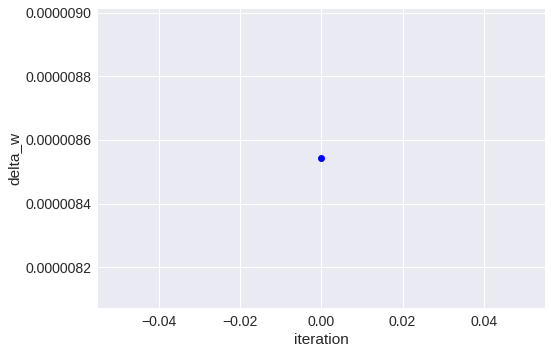

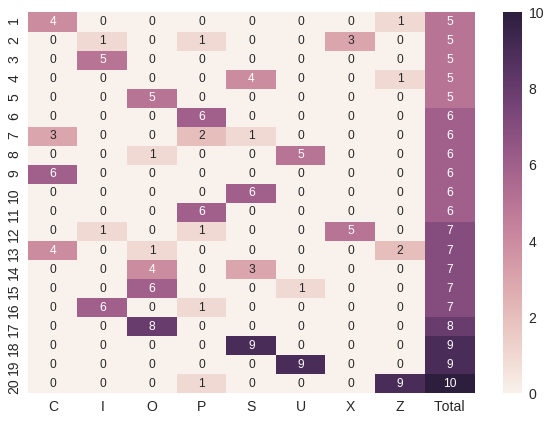

In [39]:
x = 625; y = 1
ini_weights = np.reshape(ini_weights,[x,y,features])
radius = 1

#neighborhood='mexican_hat'
#neighborhood='bubble'
#neighborhood='gaussian'
neighborhood='triangle'

somB = MiniSom(x=x, y=y, input_len=features, sigma=radius, learning_rate=learningrate, neighborhood_function=neighborhood)  # initialization of 25x25 SOM
somB._weights = ini_weights
#somB.random_weights_init(alphabet)  # initialize weights with random values 
somB.train_delta(alphabet, delta=0.0001, max_iteration=2000)

weightsB = somB._weights



# Visualizing Results
if x>1 and y>1:
    plt.figure(figsize=(8, 8))
    wmap = {}
    im = 0
    for x, t in zip(alphabet, label):  # scatterplot
        w = somB.winner(x)
        wmap[w] = im
        plt. text(w[0]+.5,
                  w[1]+.5,
                  label2[t],
                  color=plt.cm.rainbow(t / 7.),
                  fontdict={'weight': 'bold',  'size': 11}
                  )
        im = im + 1
    plt.axis([0, weightsB.shape[0], 0,  weightsB.shape[1]])
    #plt.savefig('resulting_images/som_digts.png')
    plt.show()


mappings = somB.win_map(alphabet)
print("Number of Winning Nodes: "+str(len(mappings)))
nodes = list(mappings) # position of nodes that contain values!
values = []
for i in nodes:
    values.append(mappings[i])
sorted_values = sorted(values, key=len)

if len(mappings)>19:
  selected_nodes = sorted_values[-20:] # 20 nodes with the most data
  result_mat =np.zeros([20,9])
  for i in range(20):
      result_mat[i,8] = len(selected_nodes[i])
      for j in range(len(selected_nodes[i])):
          zeroo = alphabet-selected_nodes[i][j]
          pos = np.where(~zeroo.any(axis=1))[0]
          result_mat[i, label[pos]] = result_mat[i, label[pos]]+1
          
else:
  selected_nodes = sorted_values
  result_mat =np.zeros([len(mappings),9])
  for i in range(len(mappings)):
      result_mat[i,8] = len(selected_nodes[i])
      for j in range(len(selected_nodes[i])):
          zeroo = alphabet-selected_nodes[i][j]
          pos = np.where(~zeroo.any(axis=1))[0]
          result_mat[i, label[pos]] = result_mat[i, label[pos]]+1



import seaborn as sn
import pandas  as pd

df_result = pd.DataFrame(result_mat, range(result_mat.shape[0]), range(9))

aylabels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10','11',
            '12', '13', '14', '15', '16', '17', '18', '19', '20']
axlabels = ['C', 'I', 'O', 'P', 'S', 'U', 'X', 'Z', 'Total']

plt.figure(figsize=(10, 7))
sn.set(font_scale=1.4)  # for label size
sn.heatmap(df_result, annot=True, annot_kws={"size": 12}, xticklabels=axlabels, yticklabels=aylabels)  # font size
plt.show()

#print("Convergence in "+str(ii)+" iterations")

#Part C

iteration= 0 delta = 1.0502243639478957e-19


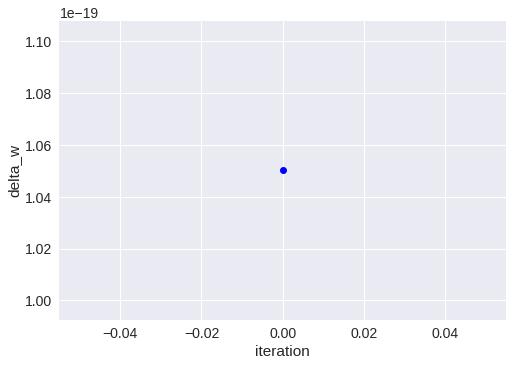

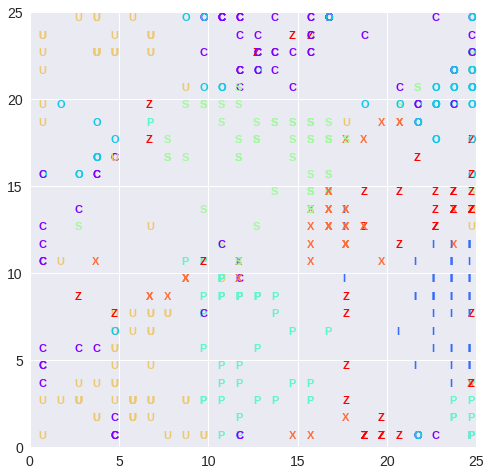

Number of Winning Nodes: 247


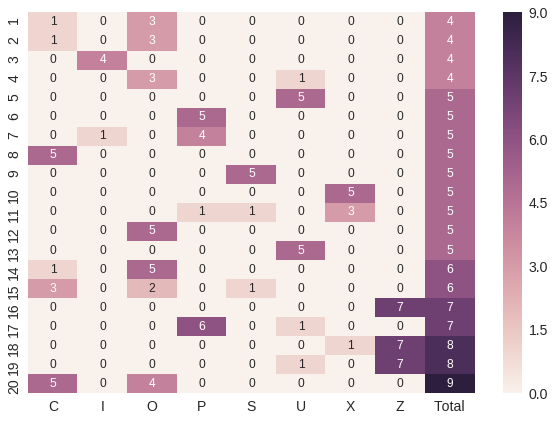

In [44]:
x = 25; y = 25
ini_weights = np.reshape(ini_weights,[x,y,features])
radius = 0

#neighborhood='mexican_hat'
#neighborhood='bubble'
#neighborhood='gaussian'
neighborhood='triangle'

somC = MiniSom(x=x, y=y, input_len=features, sigma=radius, learning_rate=learningrate, neighborhood_function=neighborhood)  # initialization of 25x25 SOM
somC._weights = ini_weights
#somC.random_weights_init(alphabet)  # initialize weights with random values 
somC.train_delta(alphabet, delta=0.0001, max_iteration=2000)

weightsC = somC._weights



# Visualizing Results
if x>1 and y>1:
    plt.figure(figsize=(8, 8))
    wmap = {}
    im = 0
    for x, t in zip(alphabet, label):  # scatterplot
        w = somC.winner(x)
        wmap[w] = im
        plt. text(w[0]+.5,
                  w[1]+.5,
                  label2[t],
                  color=plt.cm.rainbow(t / 7.),
                  fontdict={'weight': 'bold',  'size': 11}
                  )
        im = im + 1
    plt.axis([0, weightsC.shape[0], 0,  weightsC.shape[1]])
    #plt.savefig('resulting_images/som_digts.png')
    plt.show()


mappings = somC.win_map(alphabet)
print("Number of Winning Nodes: "+str(len(mappings)))
nodes = list(mappings) # position of nodes that contain values!
values = []
for i in nodes:
    values.append(mappings[i])
sorted_values = sorted(values, key=len)

if len(mappings)>19:
  selected_nodes = sorted_values[-20:] # 20 nodes with the most data
  result_mat =np.zeros([20,9])
  for i in range(20):
      result_mat[i,8] = len(selected_nodes[i])
      for j in range(len(selected_nodes[i])):
          zeroo = alphabet-selected_nodes[i][j]
          pos = np.where(~zeroo.any(axis=1))[0]
          result_mat[i, label[pos]] = result_mat[i, label[pos]]+1
          
else:
  selected_nodes = sorted_values
  result_mat =np.zeros([len(mappings),9])
  for i in range(len(mappings)):
      result_mat[i,8] = len(selected_nodes[i])
      for j in range(len(selected_nodes[i])):
          zeroo = alphabet-selected_nodes[i][j]
          pos = np.where(~zeroo.any(axis=1))[0]
          result_mat[i, label[pos]] = result_mat[i, label[pos]]+1



import seaborn as sn
import pandas  as pd

df_result = pd.DataFrame(result_mat, range(result_mat.shape[0]), range(9))

aylabels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10','11',
            '12', '13', '14', '15', '16', '17', '18', '19', '20']
axlabels = ['C', 'I', 'O', 'P', 'S', 'U', 'X', 'Z', 'Total']

plt.figure(figsize=(10, 7))
sn.set(font_scale=1.4)  # for label size
sn.heatmap(df_result, annot=True, annot_kws={"size": 12}, xticklabels=axlabels, yticklabels=aylabels)  # font size
plt.show()

#print("Convergence in "+str(ii)+" iterations")